# using Lingdong Huang's Chinese Hershey fonts

repository here: https://github.com/LingDong-/chinese-hershey-font

check for other fonts here: https://github.com/LingDong-/chinese-hershey-font/tree/master/dist/json

In [1]:
!curl -L -O https://raw.githubusercontent.com/LingDong-/chinese-hershey-font/master/dist/json/STRK-Heiti.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9604k  100 9604k    0     0  8917k      0  0:00:01  0:00:01 --:--:-- 8917k


In [2]:
import json

In [17]:
import vsketch
from bezmerizing import Polyline

In [57]:
from numpy.random import uniform
import numpy as np

In [173]:
import itertools
import math
import random

In [3]:
chr2plines = json.load(open("STRK-Mingti.json"))

In [10]:
chr2plines.keys()

dict_keys(['U+3400', 'U+3401', 'U+3402', 'U+3403', 'U+3404', 'U+3405', 'U+3406', 'U+3407', 'U+3408', 'U+3409', 'U+340A', 'U+340B', 'U+340C', 'U+340D', 'U+340E', 'U+340F', 'U+3410', 'U+3411', 'U+3412', 'U+3413', 'U+3414', 'U+3415', 'U+3416', 'U+3417', 'U+3418', 'U+3419', 'U+341A', 'U+341B', 'U+341C', 'U+341D', 'U+341E', 'U+341F', 'U+3420', 'U+3421', 'U+3422', 'U+3423', 'U+3424', 'U+3425', 'U+3426', 'U+3427', 'U+3428', 'U+3429', 'U+342A', 'U+342B', 'U+342C', 'U+342D', 'U+342E', 'U+342F', 'U+3430', 'U+3431', 'U+3432', 'U+3433', 'U+3434', 'U+3435', 'U+3436', 'U+3437', 'U+3438', 'U+3439', 'U+343A', 'U+343B', 'U+343C', 'U+343D', 'U+343E', 'U+343F', 'U+3440', 'U+3441', 'U+3442', 'U+3443', 'U+3444', 'U+3445', 'U+3446', 'U+3447', 'U+3448', 'U+3449', 'U+344A', 'U+344B', 'U+344C', 'U+344D', 'U+344E', 'U+344F', 'U+3450', 'U+3451', 'U+3452', 'U+3453', 'U+3454', 'U+3455', 'U+3456', 'U+3457', 'U+3458', 'U+3459', 'U+345A', 'U+345B', 'U+345C', 'U+345D', 'U+345E', 'U+345F', 'U+3460', 'U+3461', 'U+3462',

check the json to see how this is formatted: it's a dictionary whose keys are unicode codepoints and whose values are lists of polylines. the codepoints need to be formatted in a specific way—here's how to do that in python:

In [4]:
chr2plines[f"U+{ord('上'):X}"]

[[[0.445, 0.0], [0.445, 1.0]],
 [[0.445, 0.445], [0.925, 0.445]],
 [[0.0, 0.99], [1.0, 0.99]]]

this function cleans it up a bit:

In [5]:
def get_plines(ch):
    return chr2plines[f"U+{ord(ch):X}"]

In [6]:
get_plines('猫')

[[[0.4, 0.4], [0.4, 0.995]],
 [[0.53, 0.01], [0.53, 0.35]],
 [[0.64, 0.43], [0.64, 0.9]],
 [[0.755, 0.01], [0.755, 0.35]],
 [[0.4, 0.44], [0.935, 0.422], [0.91, 0.955]],
 [[0.345, 0.17], [1.0, 0.17]],
 [[0.4, 0.655], [0.945, 0.655]],
 [[0.4, 0.89], [0.945, 0.89]],
 [[0.31, 0.135], [0.02, 0.425]],
 [[0.115, 0.1], [0.278, 0.41], [0.152, 0.637], [0.005, 0.775]],
 [[0.27, 0.375], [0.292, 0.828], [0.18, 0.99]]]

here's how to draw one glyph:

In [7]:
import vsketch

In [124]:
import numpy as np
def to_plist(font, ch):
    plines = []
    current_plist = []
    mode = ''
    for t in dch(font, ch).split():
        if t[0] in ('M', 'L'):
            mode = t[0]
            t = t[1:]
        coords = [int(x) for x in t.split(',')]
        if mode == 'M':
            if len(current_plist) > 0:
                plines.append(current_plist)
                current_plist = []
        current_plist.append(coords)
    plines.append(current_plist)
    return plines

apply line thickness

In [125]:
def draw_with_brush(vsk, curve):
    for i in range(10):
        offset_pline = curve.tangent_offsets(
            distances=[0, i*0.03, 0, i*-0.05, 0], samples_per=24).vertices
        vsk.polygon(offset_pline)

In [126]:
def create_figure():
    chars = '沈暘张翔'
    all_strokes = []
    for item in chars:
        plist = get_plines(item)
        for stroke in plist:
            if len(stroke) >= 6:
                # first half of polyline
                all_strokes.append(stroke[:int(len(stroke)/2)])
                # second half of polyline
                all_strokes.append(stroke[int(len(stroke)/2):])
            else:
                all_strokes.append(stroke)
    return all_strokes

something that doesn't work

In [181]:
def generate_random_glyph(chars):
    all_strokes = []
    for item in chars:
        plist = get_plines(item)
        for stroke in plist:
            if len(stroke) >= 6:
                # first half of polyline
                all_strokes.append(stroke[:int(len(stroke)/2)])
                # second half of polyline
                all_strokes.append(stroke[int(len(stroke)/2):])
            else:
                all_strokes.append(stroke)
    return all_strokes

In [184]:
vsk = vsketch.Vsketch()
vsk.size("150mm", "50mm")
vsk.scale("1mm")
for i in range(10):
    chars = '沈暘张翔'
    figs = generate_random_glyph(chars)
    try:
        spline = Polyline(figs).catmull_spline(-0.5)
    except IndexError:
        figs = [(0, 0), (0, 0)]
        spline = Polyline(figs).catmull_spline(-0.5)
    curve_pts = spline.to_polyline(20)
    with vsk.pushMatrix():
        vsk.translate(i*15, 25)
        vsk.scale(4)
        draw_with_brush(vsk, spline)
vsk.display()


ValueError: at least three vertices needed

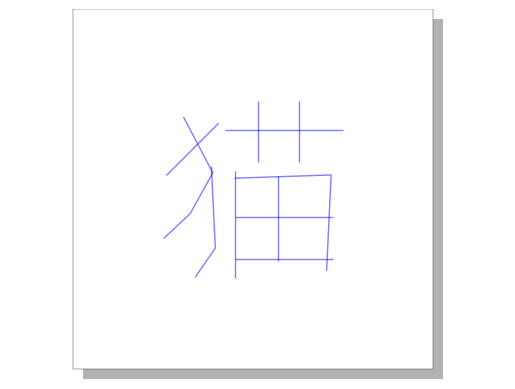

In [269]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(50)
    for pline in get_plines('猫'):
        vsk.polygon(pline)
vsk.display()

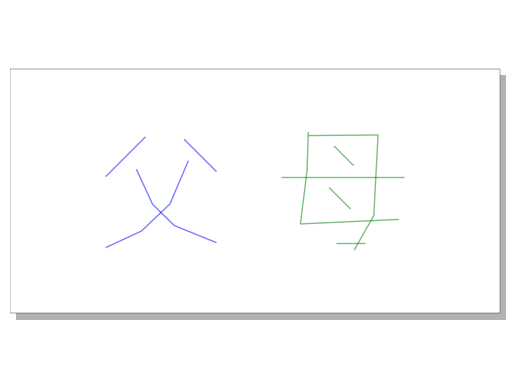

In [268]:
vsk = vsketch.Vsketch()
vsk.size("200mm", "100mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(50)
    vsk.stroke(1)
    for pline in get_plines('父'):
        vsk.polygon(pline)
    vsk.stroke(2)
    for pline in get_plines('母'):
        
        with vsk.pushMatrix():      
            vsk.translate(1.5,0)
            vsk.polygon(pline)
vsk.display()
vsk.save("cover.svg")

In [15]:
def str_to_plist(font, s, kern=1):
    current_x = 0
    all_plines = []
    for ch in s:
        max_x = 0
        for pline in to_plist(font, ch):
            # translate to the current position of cursor
            translated = [[x+current_x, y] for x, y in pline]
            x_extent = max([c[0] for c in pline])
            if x_extent > max_x:
                max_x = x_extent
            all_plines.append(translated)
        current_x += max_x + kern
    return all_plines

In [175]:
chars = '沈暘张翔'
#chars += chars.upper()
#chars += '张翔'
all_strokes = []
for item in chars:
    plist = get_plines(item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

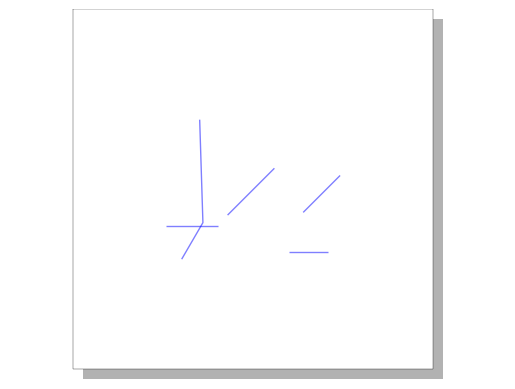

In [270]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("50mm")
for stroke in random.sample(all_strokes, 5):
    vsk.polygon(stroke)
vsk.display()
vsk.save("s1.svg")

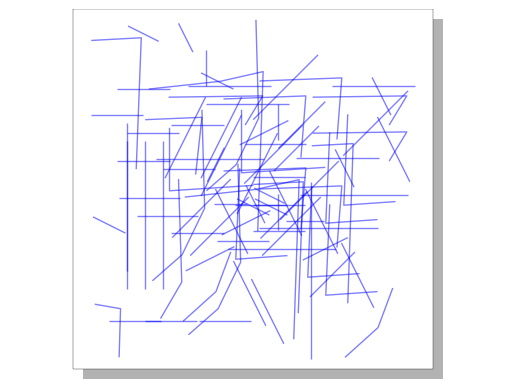

In [171]:
import random
import vsketch

vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("50mm")
for y in range(10):
    for x in range(10):
        with vsk.pushMatrix():            
            vsk.translate(x*0.1, y*0.1)
            stroke = random.choice(all_strokes)
            vsk.polygon(stroke)
vsk.display()


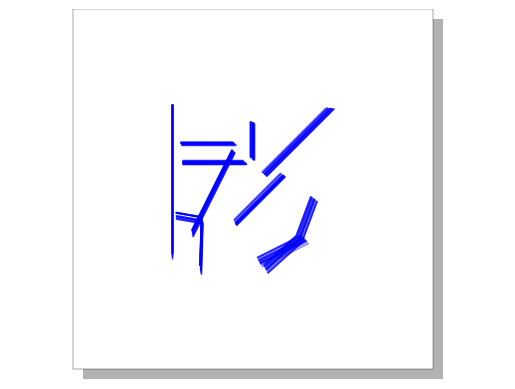

In [172]:
import random
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("50mm")
stroke(1)
for stroke in random.sample(all_strokes, 10):
    for i in range(20):
        with vsk.pushMatrix():
            vsk.scale(uniform(0.99, 1.05))
            vsk.translate((i+uniform(-0.5, 0.5))*0.0001, 0)
            vsk.polygon(stroke)
vsk.display()



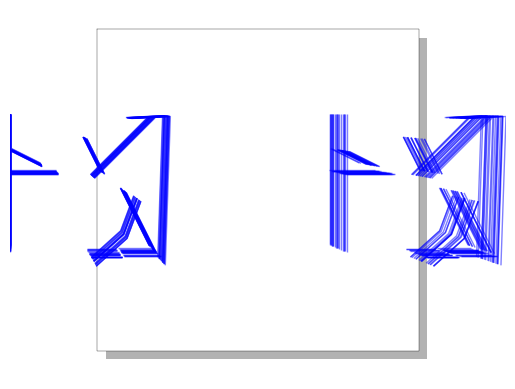

In [190]:
import random
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("50mm")

for stroke in random.sample(all_strokes, 10):
    for i in range(20):
        with vsk.pushMatrix():
            vsk.scale(uniform(0.99, 1.05))
            vsk.translate((i+uniform(-0.5, 0.5))*0.0001, 0)
            vsk.polygon(stroke)
            with vsk.pushMatrix():
                vsk.translate(2, 0)
                vsk.polygon(stroke)
vsk.display()

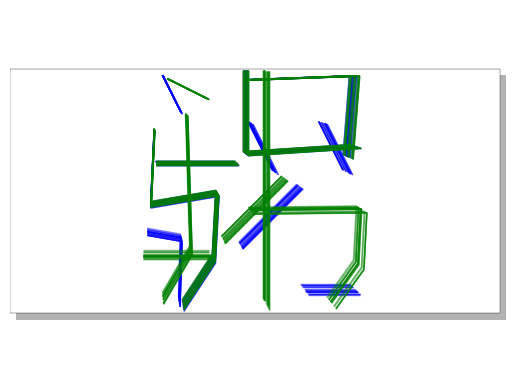

In [267]:
import random
vsk = vsketch.Vsketch()
vsk.size("200mm", "100mm")
vsk.scale("50mm")

# First polygon
vsk.stroke(1)
for stroke in random.sample(all_strokes, 10):
    for i in range(20):
        with vsk.pushMatrix():
            vsk.scale(uniform(1.89, 1.99))
            #vsk.translate((i+uniform(-0.5, 0.5))*0.0001, 0)
            vsk.polygon(stroke)

# Second polygon
vsk.stroke(2)
for stroke in random.sample(all_strokes, 10):
    for i in range(20):
        with vsk.pushMatrix():
            vsk.scale(uniform(1.89, 1.99))
            vsk.translate((i+uniform(-0.2, 0.2))*0.0001, 0)
            vsk.translate(0,0)
            vsk.polygon(stroke)

vsk.display()
vsk.save("page15.svg")


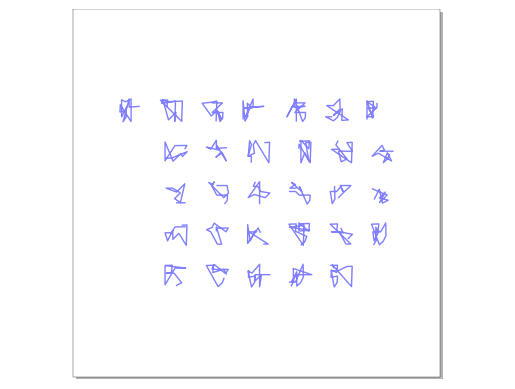

In [271]:
import random
vsk = vsketch.Vsketch()
vsk.size("400mm", "400mm")
vsk.scale("5mm")

x = -50
y = 0

for i in range(30):
    strokes = random.sample(all_strokes, 5)
    smooshed = list(chain(*strokes))
    
    with vsk.pushMatrix():
        vsk.translate(x, y)
        vsk.scale(5)
        vsk.polygon(smooshed)
        
        x += 9
        
        if x > 12.5:
            x = -40
            y += 9

vsk.display()
vsk.save("all.svg")

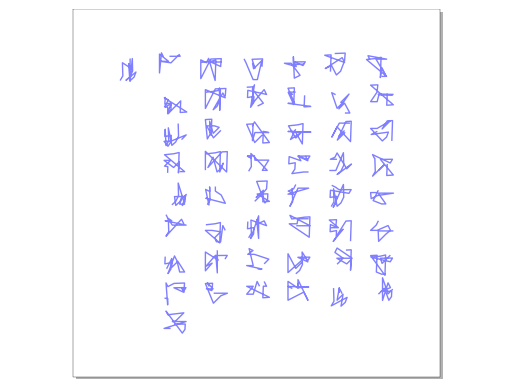

In [208]:
import random
vsk = vsketch.Vsketch()
vsk.size("400mm", "400mm")
vsk.scale("5mm")

x = -50
y = 0

for i in range(50):
    strokes = random.sample(all_strokes, 5)
    smooshed = list(chain(*strokes))
    
    with vsk.pushMatrix():
        vsk.translate(x, y + random.uniform(-1, 1))
        vsk.scale(5)
        vsk.polygon(smooshed)
        
        x += 9
        
        if x > 12.5:
            x = -40
            y += 7

vsk.display()


In [141]:
vsk.save("good.svg")

In [101]:
for stroke in random.sample(all_strokes, 5):
    thick = Polyline(stroke).augment().fancy_curve(
    samples_per=24,
    thicknesses=[0, 4]
).vertices

In [87]:
print(thick)

[[ 0.52        0.01      ]
 [ 0.54020202  0.01512448]
 [ 0.56040404  0.02054437]
 [ 0.58060606  0.02625358]
 [ 0.60080808  0.03224602]
 [ 0.6210101   0.03851559]
 [ 0.64121212  0.04505621]
 [ 0.66141414  0.05186178]
 [ 0.68161616  0.05892622]
 [ 0.70181818  0.06624343]
 [ 0.7220202   0.07380732]
 [ 0.74222222  0.0816118 ]
 [ 0.76242424  0.08965078]
 [ 0.78262626  0.09791817]
 [ 0.80282828  0.10640788]
 [ 0.8230303   0.11511381]
 [ 0.84323232  0.12402988]
 [ 0.86343434  0.13315   ]
 [ 0.88363636  0.14246807]
 [ 0.90383838  0.151978  ]
 [ 0.9240404   0.16167371]
 [ 0.94424242  0.1715491 ]
 [ 0.96444444  0.18159808]
 [ 0.98464646  0.19181456]
 [ 1.00484848  0.20219245]
 [ 1.02505051  0.21272565]
 [ 1.04525253  0.22340809]
 [ 1.06545455  0.23423366]
 [ 1.08565657  0.24519627]
 [ 1.10585859  0.25628984]
 [ 1.12606061  0.26750828]
 [ 1.14626263  0.27884548]
 [ 1.16646465  0.29029537]
 [ 1.18666667  0.30185185]
 [ 1.20686869  0.31350883]
 [ 1.22707071  0.32526022]
 [ 1.24727273  0.33709992]
 

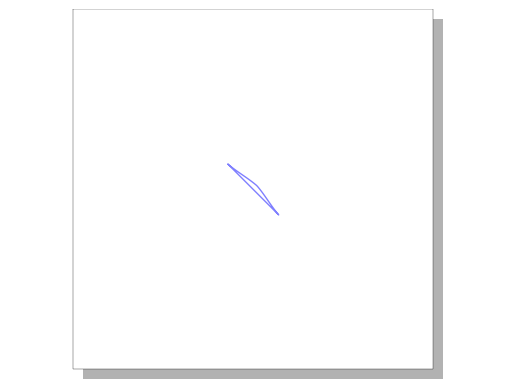

In [103]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("5mm")
vsk.stroke(1)
vsk.polygon(thick, close=False)
vsk.display()

In [66]:
vsk.save("test.svg")

In [27]:
from itertools import chain

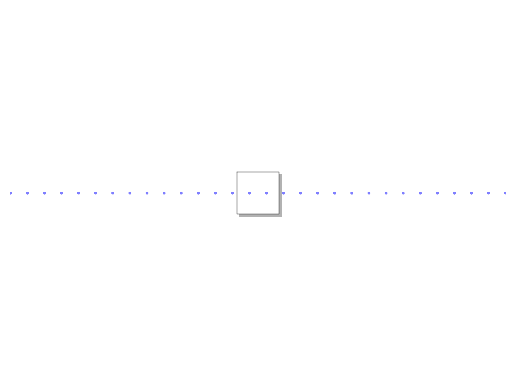

In [106]:
import random
vsk = vsketch.Vsketch()
vsk.size("50mm", "50mm")
vsk.scale("1mm")
for i in range(30):
    strokes = random.sample(all_strokes, 30)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate( i * 20, 0)
        vsk.polygon(smooshed)
vsk.display()